In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("ADCN_stats.txt", names = ["epoch","t_l","t_a","v_l","v_a"], index_col = None)
df

,epoch,t_l,t_a,v_l,v_a
0,"{""epoch"": 0","""training_loss"": 0.7154231142997741","""training_acc"": 53.0","""val_loss"": 0.6819815278053284","""val_acc"": 44.0}"
1,"{""epoch"": 1","""training_loss"": 0.6708936429023743","""training_acc"": 61.0","""val_loss"": 0.6391465711593628","""val_acc"": 64.0}"
2,"{""epoch"": 2","""training_loss"": 0.6515278005599976","""training_acc"": 56.0","""val_loss"": 0.6271342968940735","""val_acc"": 64.0}"
3,"{""epoch"": 3","""training_loss"": 0.5755137729644776","""training_acc"": 67.0","""val_loss"": 0.5891461133956909","""val_acc"": 68.0}"
4,"{""epoch"": 4","""training_loss"": 0.5243198466300965","""training_acc"": 78.0","""val_loss"": 0.6811238300800323","""val_acc"": 52.0}"
...,...,...,...,...,...
69,"{""epoch"": 69","""training_loss"": 0.05763490214943886","""training_acc"": 99.0","""val_loss"": 0.8982399463653564","""val_acc"": 60.0}"
70,"{""epoch"": 70","""training_loss"": 0.05477523478679359","""training_acc"": 100.0","""val_loss"": 1.0797714273724706","""val_acc"": 76.0}"
71,"{""epoch"": 71","""training_loss"": 0.11413884971290827","""training_acc"": 94.0","""val_loss"": 0.7886336675286293","""val_acc"": 72.0}"
72,"{""epoch"": 72","""training_loss"": 0.02232827914878726","""training_acc"": 100.0","""val_loss"": 1.1207467269897462","""val_acc"": 60.0}"


In [ ]:
for i in range(len(df.index)):
  #### epoch 삭제 
  df["epoch"][i]= df["epoch"][i].replace("{\"epoch\": ","")
  ### t_1 삭제 
  df["t_l"][i]=df["t_l"][i].replace("\"training_loss\": ","")
  ## t_a 삭제
  df["t_a"][i]=df["t_a"][i].replace("\"training_acc\": ","")
  # v_l 삭제 
  df["v_l"][i]=df["v_l"][i].replace("\"val_loss\": ","")
  # v_a 삭제 
  df["v_a"][i]=df["v_a"][i].replace("\"val_acc\": ","")

df

,epoch,t_l,t_a,v_l,v_a
0,0,0.7154231142997741,53.0,0.6819815278053284,44.0}
1,1,0.6708936429023743,61.0,0.6391465711593628,64.0}
2,2,0.6515278005599976,56.0,0.6271342968940735,64.0}
3,3,0.5755137729644776,67.0,0.5891461133956909,68.0}
4,4,0.5243198466300965,78.0,0.6811238300800323,52.0}
...,...,...,...,...,...
69,69,0.05763490214943886,99.0,0.8982399463653564,60.0}
70,70,0.05477523478679359,100.0,1.0797714273724706,76.0}
71,71,0.11413884971290827,94.0,0.7886336675286293,72.0}
72,72,0.02232827914878726,100.0,1.1207467269897462,60.0}


In [ ]:
y_vloss = df["v_l"].values.tolist()
y_vloss = [float(i) for i in y_vloss]
y_loss = df["t_l"].values.tolist()
y_loss = [float(i) for i in y_loss]

In [ ]:
y_vloss

[0.6819815278053284,
 0.6391465711593628,
 0.6271342968940735,
 0.5891461133956909,
 0.6811238300800323,
 0.7048358345031738,
 0.5605824899673462,
 0.6937769126892089,
 0.7842287212610245,
 1.5689826571196317,
 1.3113275814056395,
 0.43333084106445313,
 0.5804302798211575,
 0.7620303606987,
 0.5341077089309693,
 0.6744721364974976,
 1.1617902660369872,
 2.381450672149658,
 0.6430165082216263,
 1.5129057231545449,
 0.8628910218179225,
 1.8836773586273194,
 0.4911066856980324,
 0.4399668025970459,
 0.7369788628816605,
 0.6055831646919251,
 0.8408774603903294,
 0.5423022232949734,
 0.45609131902456285,
 0.45849755927920344,
 0.37463781774044036,
 0.5335081458091736,
 0.5083287179470062,
 0.7474664735794068,
 0.4219642341136932,
 0.39480189204216004,
 0.712340636253357,
 0.7933662352710962,
 0.3638856720924377,
 0.4085400581359863,
 2.0318525149533526,
 0.6741709637641907,
 1.2455528233200313,
 0.36292059436440466,
 0.37072105050086973,
 0.5718640762567521,
 0.45802801221609113,
 0.9646737

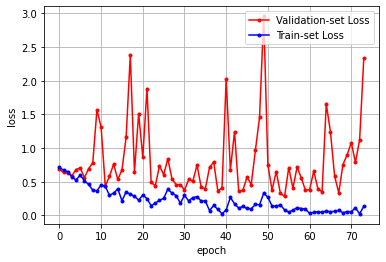

In [83]:
x_len = np.arange(len(y_loss))
x_len = list(x_len)
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
#plt.yticks(np.arange(0, 1))
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()